# Plot Evaluation Results

In [ ]:
!pip install pandas matplotlib seaborn

In [43]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
df = pd.DataFrame(columns=["filename", "optimization_type", "line_reduction"])

for optimization_type in ["tdce", "lvn", "combined"]:

    bril_files = glob.glob(f"./{optimization_type}/*.bril")

    for bril_file in bril_files:
        bril_name = bril_file.split("/")[-1]

        with open(bril_file, "r") as f:
            bril_lines = f.readlines()
        # df.loc[len(df)] = [bril_name, len(bril_lines), False]

        out_file = bril_file.replace(".bril", ".out")
        with open(out_file, "r") as f:
            out_lines = f.readlines()
        # df.loc[len(df)] = [bril_name, len(out_lines), True]

        df.loc[len(df)] = [bril_name, optimization_type, len(bril_lines) - len(out_lines)]


In [51]:
df.to_csv("results.csv")
df

,filename,optimization_type,line_reduction
0,quadratic.bril,tdce,5
1,montgomery.bril,tdce,12
2,primes-between.bril,tdce,3
3,mod_pow.bril,tdce,1
4,orders.bril,tdce,21
...,...,...,...
199,sum-divisible-by-m.bril,combined,3
200,fizz-buzz.bril,combined,5
201,bitwise-ops.bril,combined,19
202,sum-digits.bril,combined,2


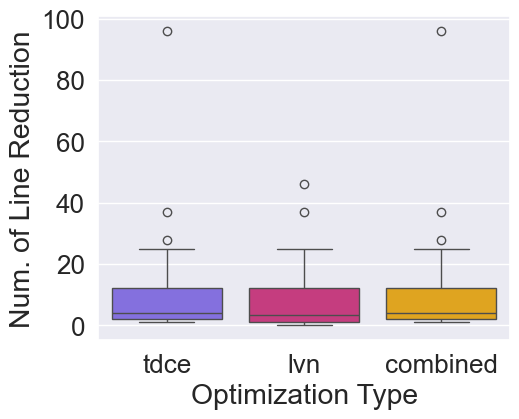

In [ ]:
plt.figure(figsize=(5, 4))

palette = {
    "tdce": "#785ef0",   # blue
    "lvn":  "#dc267f",   # orange
    "combined":  "#ffb000",   # green
}

sns.set_theme(color_codes=True, font_scale=1.7)

t = df.copy()
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]

ax = sns.boxplot(data=t, x="Optimization Type", y="Num. of Line Reduction", hue="Optimization Type", palette=palette)

plt.tight_layout(pad=0)

In [59]:
# Group by optimization type
grouped = t.groupby("Optimization Type")["Num. of Line Reduction"]

# Compute summary stats
stats = grouped.describe()

# Compute quartiles and IQR
quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ["Q1", "Median", "Q3"]
quartiles["IQR"] = quartiles["Q3"] - quartiles["Q1"]

# Compute whiskers (Tukey definition: 1.5 * IQR from Q1/Q3)
def whiskers(x):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = (x[x >= q1 - 1.5*iqr]).min()
    upper = (x[x <= q3 + 1.5*iqr]).max()
    return pd.Series({"Lower whisker": lower, "Upper whisker": upper})

whisk = grouped.apply(whiskers)

# Merge everything into one table
summary = stats.join(quartiles).join(whisk)

print(summary.round(2))

                                 count  mean    std  min  25%  50%    75%  \
Optimization Type                                                           
combined          Lower whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   
                  Upper whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   
lvn               Lower whisker   68.0  7.87   9.35  0.0  1.0  3.5  12.25   
                  Upper whisker   68.0  7.87   9.35  0.0  1.0  3.5  12.25   
tdce              Lower whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   
                  Upper whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   

                                  max   Q1  Median     Q3    IQR  \
Optimization Type                                                  
combined          Lower whisker  96.0  2.0     4.0  12.25  10.25   
                  Upper whisker  96.0  2.0     4.0  12.25  10.25   
lvn               Lower whisker  46.0  1.0     3.5  12.25  11.25   
                  Upper whisker  46.0  1.0 

<Figure size 500x400 with 0 Axes>

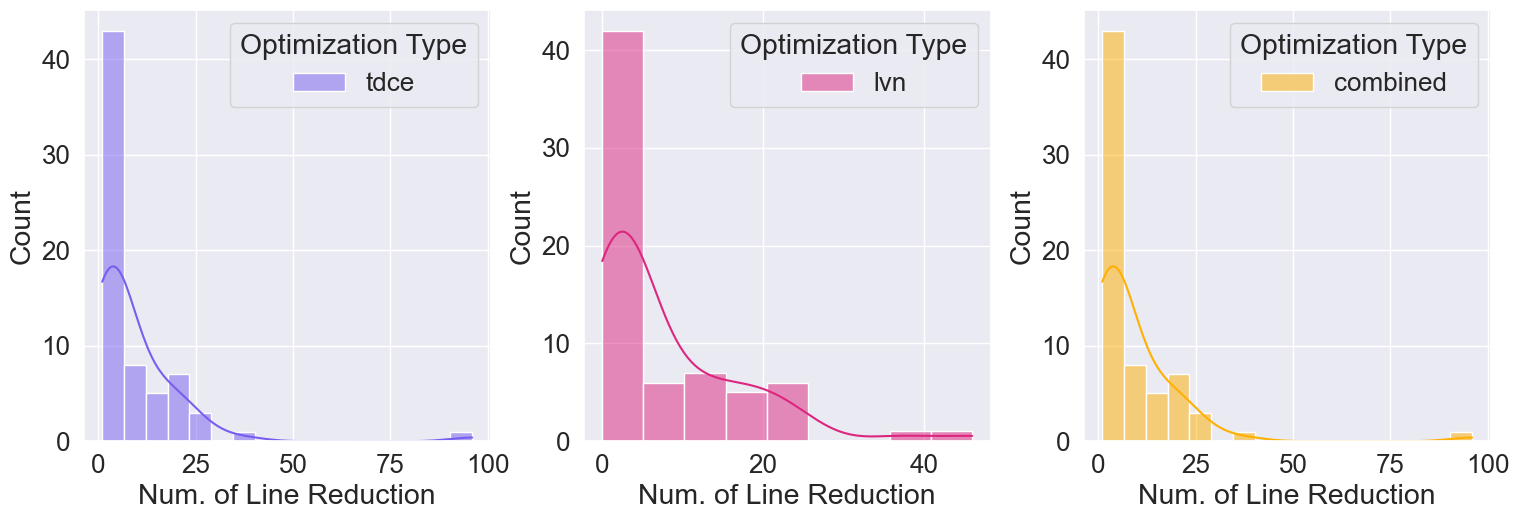

In [ ]:
plt.figure(figsize=(5, 4))

sns.set_theme(color_codes=True, font_scale=1.7)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

t = df.copy()
t = t[t["optimization_type"] == "tdce"]
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]
ax = sns.histplot(data=t, x="Num. of Line Reduction", hue="Optimization Type", kde=True, palette=palette, ax=axes[0])

t = df.copy()
t = t[t["optimization_type"] == "lvn"]
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]
ax = sns.histplot(data=t, x="Num. of Line Reduction", hue="Optimization Type", kde=True, palette=palette, ax=axes[1])

t = df.copy()
t = t[t["optimization_type"] == "combined"]
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]
ax = sns.histplot(data=t, x="Num. of Line Reduction", hue="Optimization Type", kde=True, palette=palette, ax=axes[2])

plt.tight_layout(pad=0)

/var/folders/mf/8dkznj5s2gn87lptkkvkr0gh0000gr/T/ipykernel_50461/4248634491.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


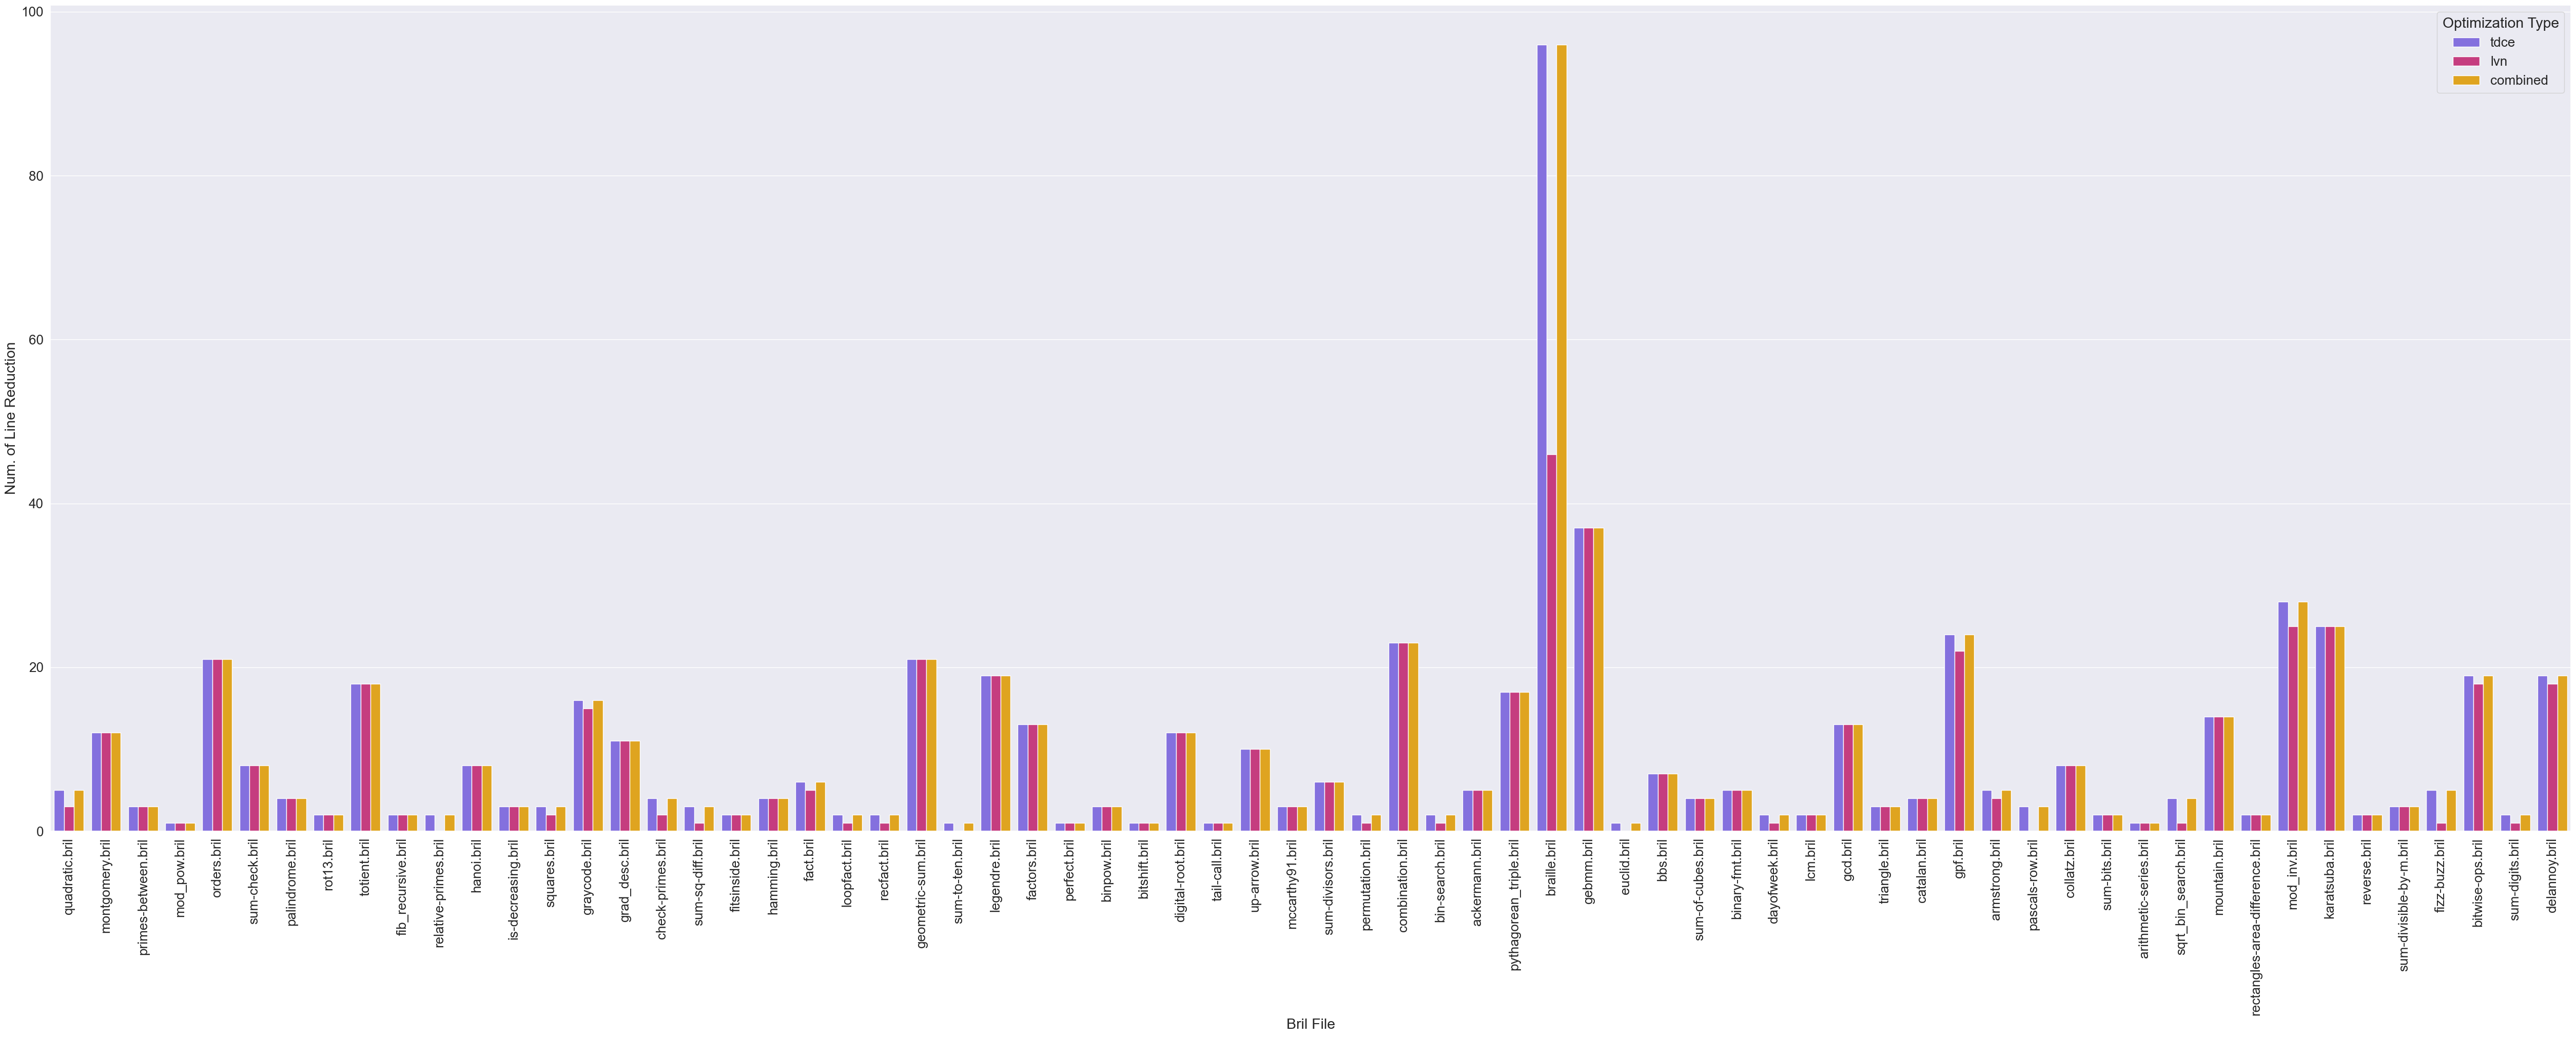

In [58]:
plt.figure(figsize=(50, 20))

palette = {
    "tdce": "#785ef0",   # blue
    "lvn":  "#dc267f",   # orange
    "combined":  "#ffb000",   # green
}

sns.set_theme(color_codes=True, font_scale=1.7)

t = df.copy()
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]

ax = sns.barplot(data=t, x="Bril File", y="Num. of Line Reduction", hue="Optimization Type", palette=palette)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout(pad=0)